# 07 - 可视化基础（visualization）

官方教学
- 底层基础matplotlib：https://matplotlib.org/stable/users/explain/quick_start.html
- `seaborn`: https://seaborn.pydata.org/tutorial/introduction.html
- `plotnine` (ggplot2 style): https://plotnine.org/guide/overview.html

第三方资源

- [Python for Data Analysis, 3E](https://wesmckinney.com/book/)
- 常用函数速查：https://github.com/gxelab/tutorials/blob/main/essential_visualization.md

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [4]:
iris = sns.load_dataset('iris')

## `matplotlib`

- Figure: 画布、画板；
- Axes: 画布上每一个具体的图；(不是指Axis的复数)
- Title: 图的标题；
- Legend: 图注；
- Axis: 图的坐标轴；
- Tick: 刻度（major大，minor小）；
- Grid: 网格；
- Marker: 点；
- Line: 线；

![](https://matplotlib.org/stable/_images/anatomy.png)

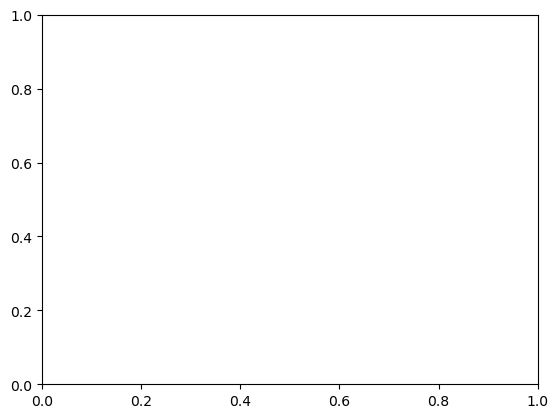

In [21]:
fig, ax = plt.subplots()  # a figure with a single Axes

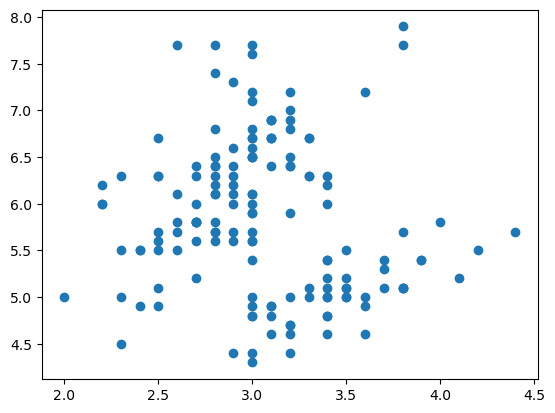

In [22]:
ax.scatter('sepal_width', 'sepal_length', data=iris)
fig

Text(0.5, 1.0, 'Iris')

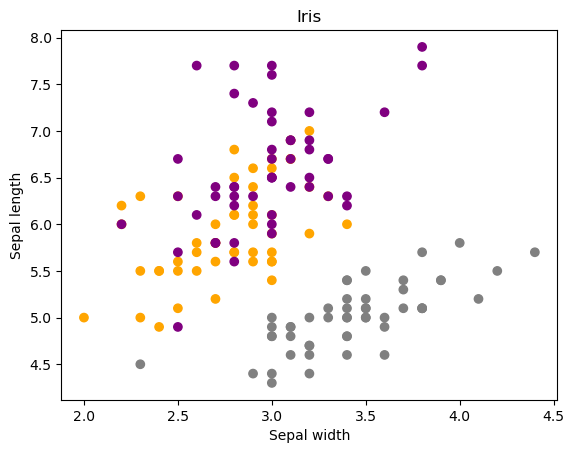

In [39]:
from matplotlib.patches import Patch


cmap = {'setosa': 'grey', 'versicolor': 'orange', 'virginica': 'purple'}
iris['species_col'] =iris['species'].map(cmap)

fig, ax = plt.subplots()
ax.scatter('sepal_width', 'sepal_length', c='species_col', data=iris)
ax.set_xlabel('Sepal width')
ax.set_ylabel('Sepal length')
ax.set_title('Iris')

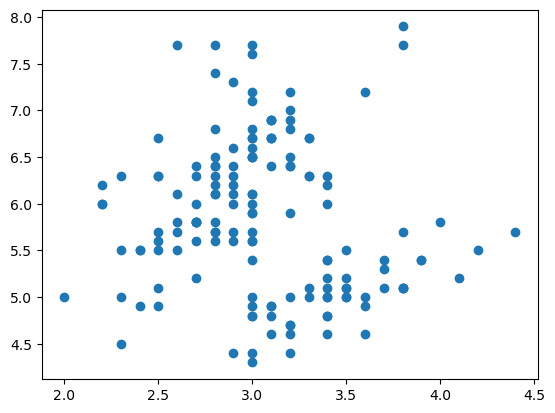

In [51]:
fig, ax = plt.subplots()
ax.scatter(iris['sepal_width'], iris['sepal_length'])

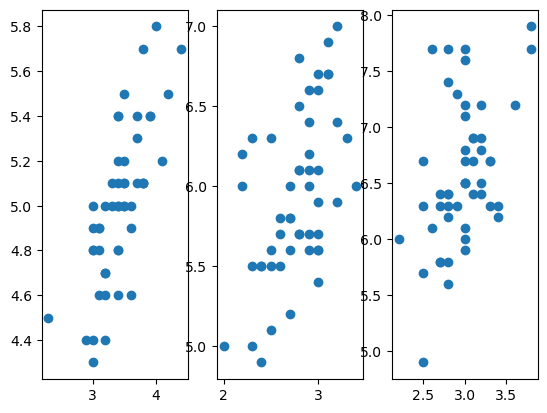

In [53]:
# 
fig, axs = plt.subplots(1, 3)
axs[0].scatter('sepal_width', 'sepal_length', data=iris[iris.species == 'setosa'])
axs[1].scatter('sepal_width', 'sepal_length', data=iris[iris.species == 'versicolor'])
axs[2].scatter('sepal_width', 'sepal_length', data=iris[iris.species == 'virginica'])

## `seaborn`

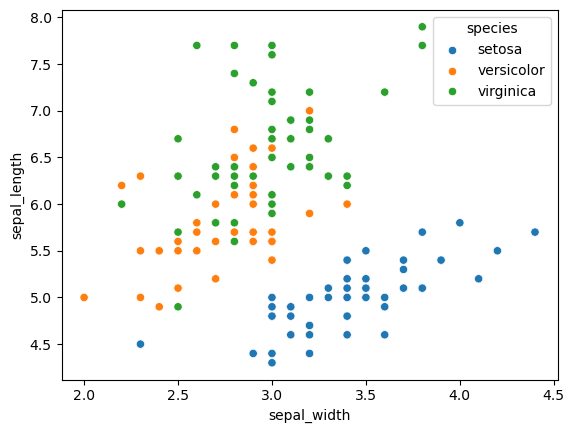

In [54]:
ax = sns.scatterplot(x='sepal_width', y='sepal_length', hue='species', data=iris)
# ax.set_title('Iris')
# seaborn作图函数的返回值是Axes，对应的Figure对象可以通过ax.figure查看

## `plotnine`

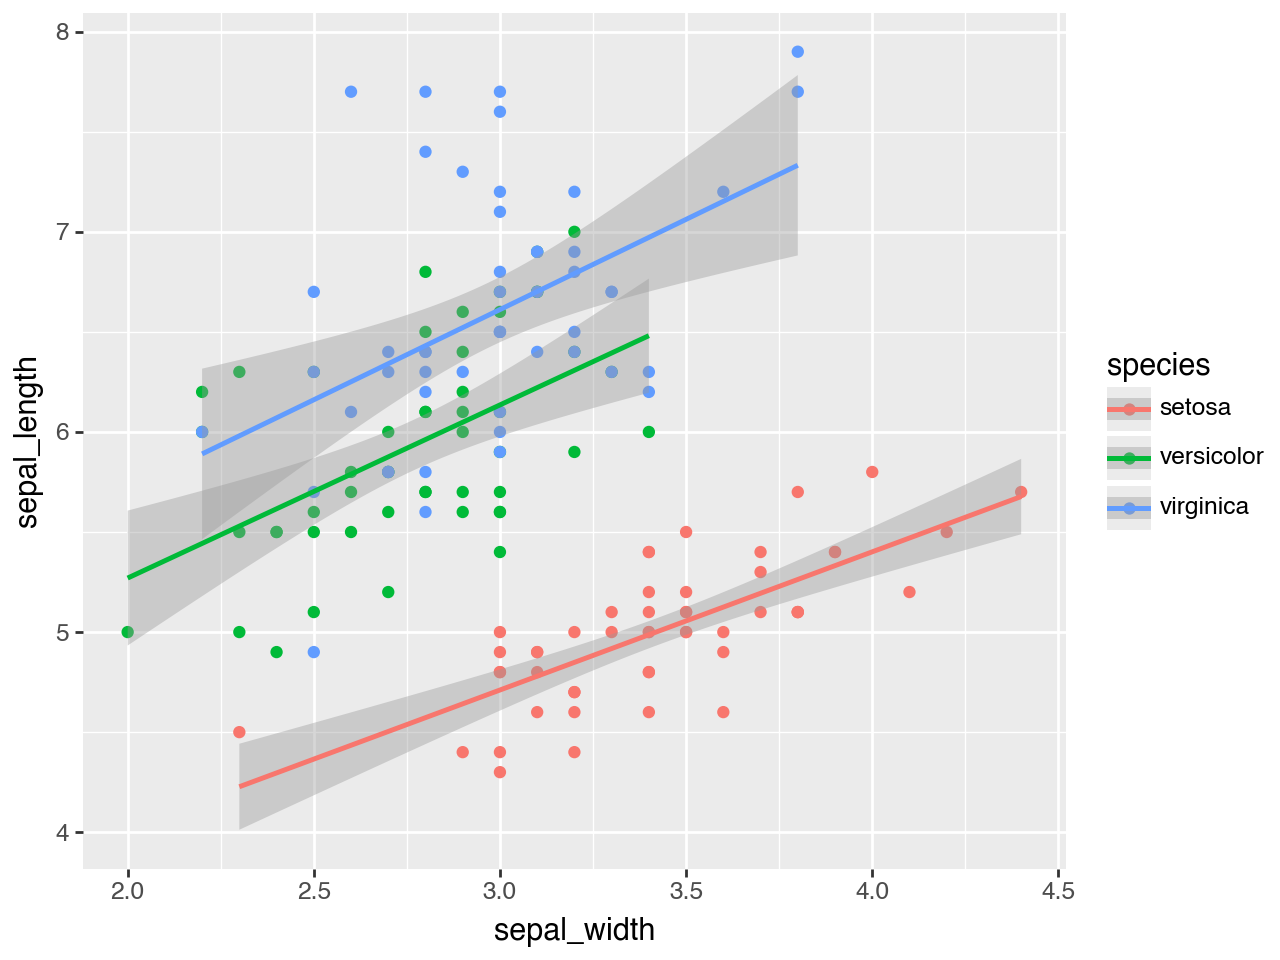

In [56]:
(
    ggplot(iris, aes(x='sepal_width', y='sepal_length', color='species')) +
    geom_point() +
    geom_smooth(method='lm')
)

Python代码与对应的R代码几乎一样，可视化效果也基本一致：

```R
ggplot(iris, aes(x=sepal_width, y=sepal_length, color=species)) +
    geom_point() +
    geom_smooth(method='lm')

```

## Homework

homework文件夹下面给大家提供了我们人类自身基因组所有基因的信息([链接](https://github.com/mt1022/p4ds/blob/main/homework/Homo_sapiens.GRCh38.111.gtf.txinfo.tsv.gz))，请大家将该文件加载到python中，尝试各种可能进行探索性分析与可视化，更好地了解我们自身的基因组。

提示：可以问一些非常简单的问题并尝试利用所学的知识编程求解，例如
- 人类有多少蛋白质编码基因(protein-coding)，多少非编码基因？
- 平均每个基因有多少个转录本？
- 转录本的长度分布是怎样的？
- 不同转录本5' UTR与3' UTR的长度是正相关还是负相关？
- CDS的长度都是3的整倍数吗？